In [8]:
%pip install torch --user
%pip install tqdm --user
%pip install subword-nmt --user

You are using pip version 18.1, however version 24.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You are using pip version 18.1, however version 24.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Using cached https://files.pythonhosted.org/packages/1b/9a/488ecac22d78eb429928b9ee4f6b6c692e116ca4bd43ef42a475698def32/subword_nmt-0.3.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6b/20/471f41173930550f279ccb65596a5ac19b9ac974a8d93679bcd3e0c31498/mock-5.1.0-py3-none-any.whl
You are using pip version 18.1, however version 24.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils import data
from torch import nn 
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, roc_curve, confusion_matrix, precision_score, recall_score, auc
from sklearn.model_selection import KFold
torch.manual_seed(1)    # reproducible torch:2 np:3
np.random.seed(1)

from config import BIN_config_DBPE
from models import BIN_Interaction_Flat
from stream import BIN_Data_Encoder
import torch
print(torch.cuda.is_available())

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

False


^C
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pip/_internal/cli/cmdoptions.py", line 16, in <module>
    from pip._internal.exceptions import CommandError
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pip/_internal/exceptions.py", line 6, in <module>
    from pip._vendor.six import iteritems
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 818, in get_code
  File "<frozen importlib._bootstrap_external>", line 917, in get_data
KeyboardInterrupt
Note: you may need to restart the kernel to use updated packages.
You are using pip version 18.1, however version 24.0 is available.
You should consider upgrading via the 'pip i

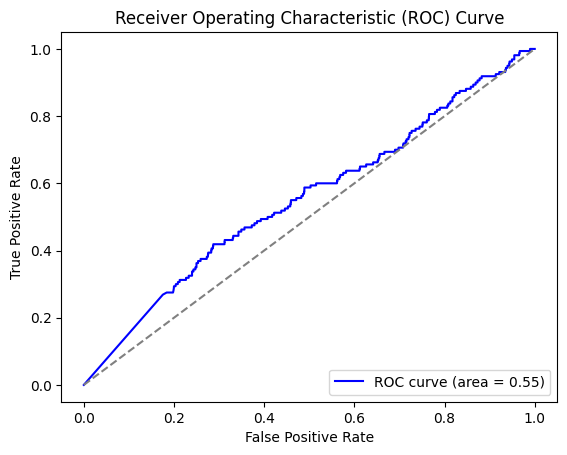

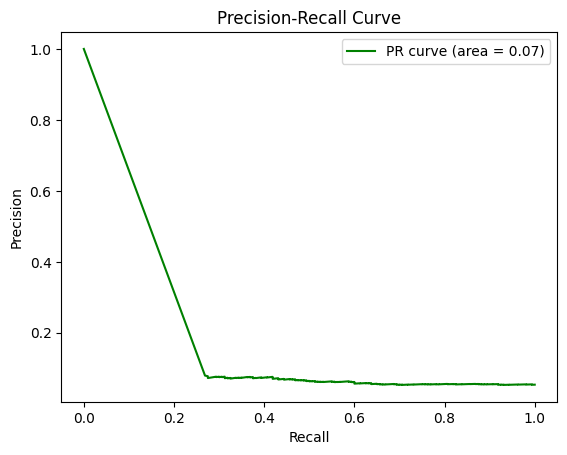

In [10]:
%pip install pandas --user
%pip install scikit-learn --user
%pip install matplotlib --user
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, roc_curve, precision_score, recall_score, auc, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# Paths to files
predictions_path = "predictions_DAVIS.csv"  # Path to your predictions CSV
labels_path = "dataset/DAVIS/val.csv"  # Path to val.csv containing true labels

# Load data
predictions_df = pd.read_csv(predictions_path)
labels_df = pd.read_csv(labels_path)

# Ensure the column names are correct
if "Prediction" not in predictions_df.columns:
    raise ValueError("The predictions CSV must contain a 'Prediction' column.")
if "Label" not in labels_df.columns:
    raise ValueError("The labels CSV must contain a 'Labels' column.")

# Extract true labels and predicted probabilities
y_true = labels_df["Label"].values  # True labels (0 or 1)
y_pred_prob = predictions_df["Prediction"].values  # Predicted probabilities (between 0 and 1)

# Convert predictions to binary with a threshold of 0.5
threshold = 0.5
y_pred_binary = (y_pred_prob >= threshold).astype(int)

# Calculate evaluation metrics
roc_auc = roc_auc_score(y_true, y_pred_prob)
pr_auc = average_precision_score(y_true, y_pred_prob)
f1 = f1_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Print the metrics
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"Precision-Recall AUC Score: {pr_auc:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_prob)
plt.figure()
plt.plot(recall_vals, precision_vals, color='green', label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()
